In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [2]:
len(df_claim)

1428600

In [3]:
#filter base on the section H
df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [4]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_27828/1681520836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [5]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [6]:
def cleantext(df_claim_uspto):
    
    # Replace certain characters with empty string
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    # Remove all numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    # Remove all symbols except alphabets and numbers
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuations
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    
    # Remove multiple spaces and replace with a single space
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    # Return the cleaned dataframe
    return df_claim_uspto

# Call the function to clean the dataframe and save the result in df_claim_uspto
df_claim_uspto = cleantext(df_claim_uspto)

# Print the cleaned dataframe
df_claim_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [8]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [10]:
#Divide the dataset into different size
df_claim_50K=df_claim_uspto[:50000]
df_claim_50K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",an apparatus comprising a head tracker config...,head tracker track head position head person g...,head tracker track head position head person g...,"[head, tracker, track, head, position, head, p..."
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",a system comprising a semiconductor chip and ...,semiconductor chip multilayer interconnecting ...,semiconductor chip multilayer interconnecting ...,"[semiconductor, chip, multilayer, interconnect..."
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,a communication system comprising a ggsn incl...,communication ggsn central processing unit net...,communication ggsn central processing unit net...,"[communication, ggsn, central, processing, uni..."
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,a hand held breast pump system comprising a b...,hand held breast pump body diaphragm sealing c...,hand held breast pump body diaphragm sealing c...,"[hand, held, breast, pump, body, diaphragm, se..."


In [11]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [12]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

# LDA on 50K patent

In [13]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_50K['Lemmatized-Claim']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 50  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4946286709523778
c_npmi coherence: -0.021556327107970636
u_mass coherence: -5.770594924388985


In [14]:
# Print the most significant words for each topic in the model
for topic_num in range(lda_model.num_topics):
    # Get the top 5 words for the current topic
    top_words = lda_model.show_topic(topic_num, topn=10)
    # Join the words into a single string for printing
    word_list = [word for word, _ in top_words]
    topic_words = " ".join(word_list)
    # Print the topic number and its top words
    print(f"Topic #{topic_num}: {topic_words}")

Topic #0: group electronic buffer led x r product ring p rail
Topic #1: message agent sending receiving recipient context resonator communication_session multimedia response
Topic #2: unit processing control detection setting process operation predetermined reading read
Topic #3: layer conductive forming structure substrate metal semiconductor material active formed
Topic #4: chip supply sheet series discharge resistance switching_element winding logical fuel_cell
Topic #5: power source distribution charging power_supply dc feed ac load lamp
Topic #6: end member body plate assembly connector cable fixed disposed movable
Topic #7: circuit output voltage input current coupled switching switch driving drive
Topic #8: signal frequency output audio input digital phase receive generate rf
Topic #9: terminal connection transistor connected external capacitor ground internal electrically_connected gate
Topic #10: image color forming based using depth correction printing processing conversion
T

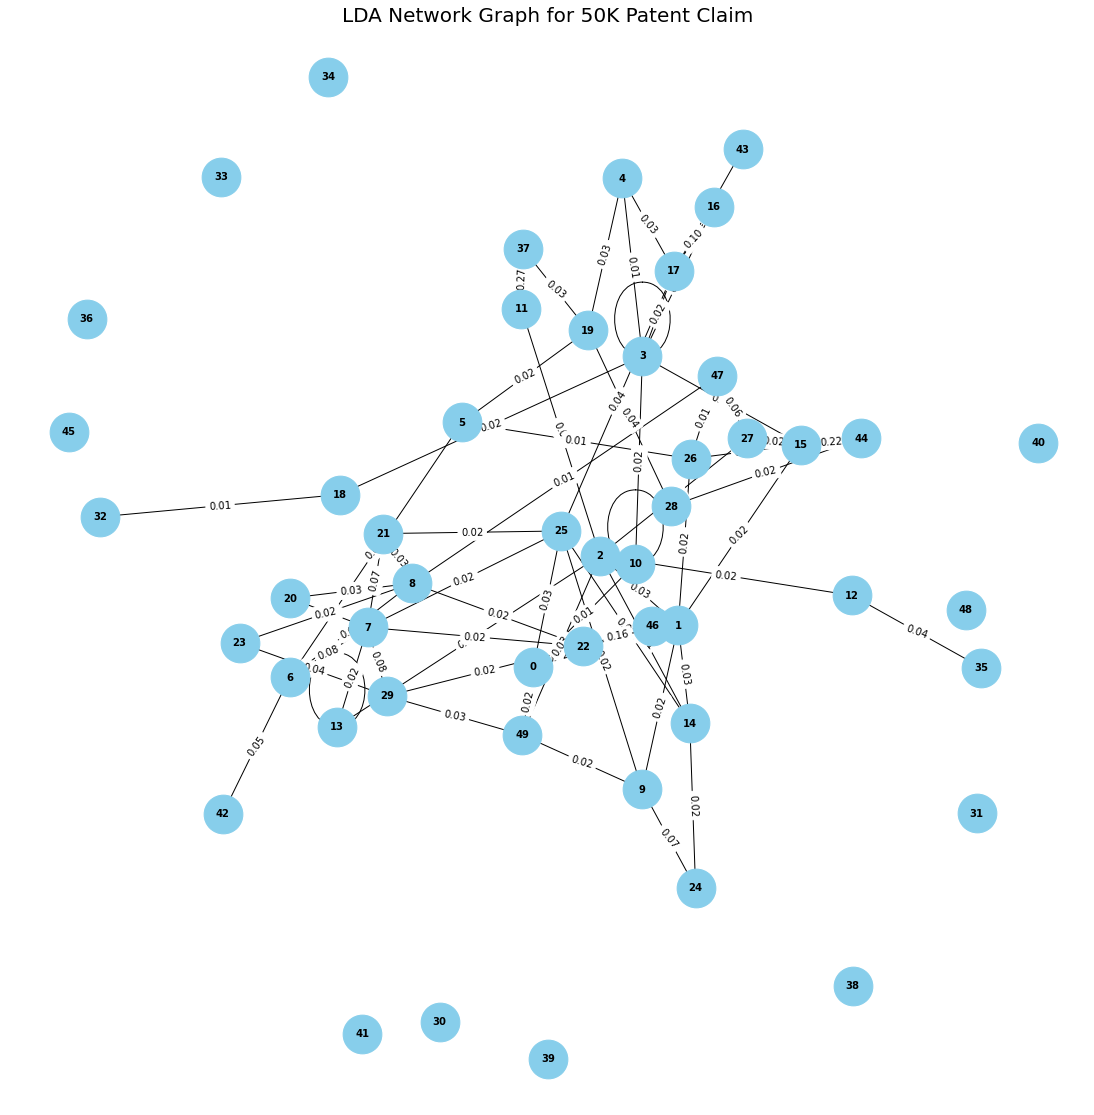

In [15]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in lda_model.show_topics(num_topics=50, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(50):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(50):
    topic_words = lda_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("LDA Network Graph for 50K Patent Claim",fontsize=20)
plt.show()

In [16]:
#Get the topic and probability for each document

In [17]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(lda_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in lda_output]

In [18]:
# Create empty columns for topic number and probability
df_claim_50K['LDA_topics'] = 0
df_claim_50K['LDA_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    topic_num, topic_prob = doc[0]
    df_claim_50K.at[i, 'LDA_topics'] = topic_num
    df_claim_50K.at[i, 'LDA_prob'] = topic_prob

C:\Users\admin\AppData\Local\Temp/ipykernel_27828/2447162103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_50K['LDA_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_27828/2447162103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_50K['LDA_prob'] = 0.0


In [43]:
df_Claim_50K_topic=df_claim_50K[["ID","Title","Claim","cpc_subclass","Lemmatized-Claim", "LDA_topics", "LDA_prob"]]
df_Claim_50K_topic

,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,LDA_topics,LDA_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",advertising displaying television program vide...,22,0.493388
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",receiving mobile switching network carrier gat...,36,0.320021
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",resistance change memory first interconnect li...,29,0.256149
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",processing first processing second processing ...,22,0.464808
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",computerimplemented transferring electronic de...,22,0.357775
...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",head tracker track head position head person g...,22,0.498502
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",semiconductor chip multilayer interconnecting ...,29,0.258500
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,communication ggsn central processing unit net...,22,0.277053
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,hand held breast pump body diaphragm sealing c...,22,0.436908


In [44]:
#prediction

In [45]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

In [46]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]

# Tokenize the new claim and apply n-gram (1,3)
query_tokens = trigram_phrases[bigram_phrases[new_claim.split()]]

# Create a bag of words representation of the query
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query using the trained LDA model
query_lda = lda_model[query_bow]

# Print the topic distribution for the query
print(query_lda)

[(4, 0.13824287), (8, 0.31708536), (10, 0.08416989), (13, 0.012291288), (22, 0.045113232), (24, 0.047810163), (25, 0.085667714), (27, 0.03520259), (34, 0.0113377), (35, 0.03244662), (38, 0.015536789), (39, 0.011312181), (45, 0.11998887), (46, 0.011632147), (47, 0.024713082)]


In [47]:
# Print the most probable topic for the query
most_probable_topic = max(query_lda, key=lambda item: item[1])[0]
print(f"Most probable topic: {most_probable_topic}")

Most probable topic: 8


In [48]:
# Sort the list of topics in descending order based on their prob
sorted_topics = sorted(query_lda, key=lambda item: item[1], reverse=True)

# Select the top 3 topics from the sorted list
top_topics = [topic[0] for topic in sorted_topics[:5]]

# Print the 3 most probable topics
print(f"5 most probable topics: {top_topics}")

5 most probable topics: [8, 4, 45, 25, 10]


In [49]:
# Print the most significant words for the topic
top_words = lda_model.show_topic(25, topn=10)
print(f"Most probable topic for the query: {' '.join(word for word, _ in top_words)}")

Most probable topic for the query: value number determining based reference time n current threshold predetermined


In [50]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 25)

In [52]:
filter_topics_lda=df_Claim_50K_topic[df_Claim_50K_topic['LDA_topics'] == 25]
filter_topics_lda = filter_topics_lda.sort_values('LDA_prob', ascending=False)
filter_topics_lda = filter_topics_lda.reset_index().rename(columns={'index': 'new_index'})
filter_topics_lda

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,LDA_topics,LDA_prob
0,8471,8944424,Carbon fiber clamping apparatus and method,1. A clamping apparatus comprising: a backing ...,"H05K,Y10T",clamping backing member aperture disposed ther...,25,0.494050
1,31764,9005414,"Magnet arrangement for a target backing tube, ...",1. A magnet arrangement for a sputtering syste...,H01J,magnet arrangement sputtering rotatable target...,25,0.489230
2,1411,8926365,Electrical connector,1. A connector assembly comprising a pin-side ...,H01R,connector assembly pinside least one pinside h...,25,0.487272
3,12120,8958855,Mobile terminal having shielding member,1. A mobile terminal comprising: a front case;...,"H04B,H04M",mobile terminal front case rear case intermedi...,25,0.487203
4,8840,8944851,Fixing member for riser card,1. A fixing member for fixing a riser card wit...,"H01R,H05K",fixing member fixing riser card edge connector...,25,0.486918
...,...,...,...,...,...,...,...,...
1365,35881,9019025,Oscillator,1. An oscillator configured to oscillate an el...,H03B,oscillator oscillate electromagnetic wave nega...,25,0.150898
1366,9334,8946683,Medium scale carbon nanotube thin film integra...,1. An electronic device comprising: a first el...,"B82Y,H01L,Y10S",electronic first electrode second electrode pa...,25,0.149090
1367,46100,9048325,Display device having an oxide semiconductor t...,1. A display device comprising: a first scan l...,"G02F,G09G,H01L",display first scan line second scan line first...,25,0.145318
1368,6884,8941335,Semiconductor light-emitting element and flash...,1. A flash light device provided with a semico...,"G03B,H01L",flash light provided semiconductor lightemitti...,25,0.142744


In [53]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [54]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_lda['Lemmatized-Claim'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_claim_vector = model.infer_vector(new_claim.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_claim_vector], doc_vectors)

In [55]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_lda['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_lda

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,LDA_topics,LDA_prob,cosin_similarity_Doc2vec
0,8471,8944424,Carbon fiber clamping apparatus and method,1. A clamping apparatus comprising: a backing ...,"H05K,Y10T",clamping backing member aperture disposed ther...,25,0.494050,0.098940
1,31764,9005414,"Magnet arrangement for a target backing tube, ...",1. A magnet arrangement for a sputtering syste...,H01J,magnet arrangement sputtering rotatable target...,25,0.489230,0.210781
2,1411,8926365,Electrical connector,1. A connector assembly comprising a pin-side ...,H01R,connector assembly pinside least one pinside h...,25,0.487272,0.016684
3,12120,8958855,Mobile terminal having shielding member,1. A mobile terminal comprising: a front case;...,"H04B,H04M",mobile terminal front case rear case intermedi...,25,0.487203,0.107313
4,8840,8944851,Fixing member for riser card,1. A fixing member for fixing a riser card wit...,"H01R,H05K",fixing member fixing riser card edge connector...,25,0.486918,0.078281
...,...,...,...,...,...,...,...,...,...
1365,35881,9019025,Oscillator,1. An oscillator configured to oscillate an el...,H03B,oscillator oscillate electromagnetic wave nega...,25,0.150898,0.246020
1366,9334,8946683,Medium scale carbon nanotube thin film integra...,1. An electronic device comprising: a first el...,"B82Y,H01L,Y10S",electronic first electrode second electrode pa...,25,0.149090,0.124556
1367,46100,9048325,Display device having an oxide semiconductor t...,1. A display device comprising: a first scan l...,"G02F,G09G,H01L",display first scan line second scan line first...,25,0.145318,0.091972
1368,6884,8941335,Semiconductor light-emitting element and flash...,1. A flash light device provided with a semico...,"G03B,H01L",flash light provided semiconductor lightemitti...,25,0.142744,0.041194


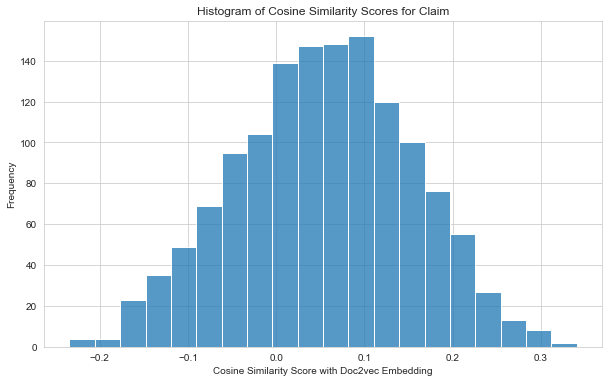

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores for Claim')
plt.xlabel('Cosine Similarity Score with Doc2vec Embedding')
plt.ylabel('Frequency')
plt.show()

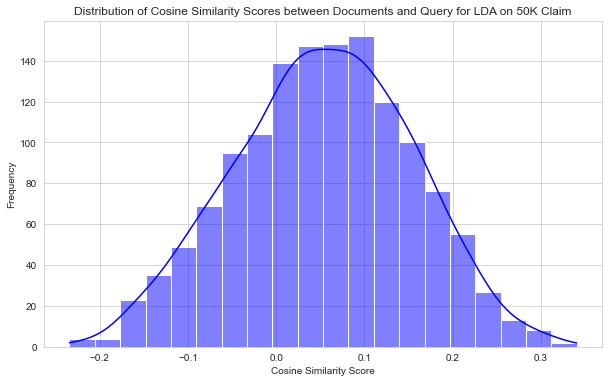

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']

# Set the style of the plot
sns.set_style("whitegrid")

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20, kde=True, color='blue')

# Set chart title and labels
plt.title('Distribution of Cosine Similarity Scores between Documents and Query for LDA on 50K Claim')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [58]:
#get the most similar doc in dataset to query

In [59]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Claim']

most_similar_doc

'1. An induction generator for a radio switch comprising: a magnet element; and an induction coil with a coil core, wherein the coil core is U-shaped, wherein a first rest position and a second rest position are in each case defined for the magnet element in contact with the limbs of the coil core, and a flux direction reversal takes place in the coil core whenever a change takes place between the first and second rest positions, wherein a movement path for the magnet element is predetermined for a movement between the first and second rest positions, and the movement path for the magnet element is pre-determined by a cam control, which is formed by a control profile and an engaging element that is guided along the control profile, wherein the induction generator has a first energy storage device which is operatively connected to the magnet element and stores energy in the course of forcing a movement from a rest position and, after reaching an intermediate position, which is defined a

In [60]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Lemmatized-Claim']

most_similar_doc

'induction generator radio switch magnet element induction coil coil core coil core ushaped first rest position second rest position case defined magnet element contact limb coil core flux direction reversal take place coil core whenever change take place first second rest position movement path magnet element predetermined movement first second rest position movement path magnet element predetermined cam control formed control profile engaging element guided along control profile induction generator first energy storage operatively connected magnet element store energy course forcing movement rest position reaching intermediate position defined along movement path magnetic force coil core suddenly decrease emits energy first energy storage magnet element order mechanically accelerate movement magnet element respective rest position leaving intermediate position'

In [61]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['ID']

most_similar_doc

9013084